In [1]:
import pandas as pd

In [2]:
import datetime

In [46]:
import requests
import numpy as np

Lista das estações automáticas:

In [5]:
# Buscando via API - INMET
aut_List = requests.get('https://apitempo.inmet.gov.br/estacoes/T')

In [30]:
# Listando os dados coletados:

# Lista de dicionários informativos de cada estação
dicts_list = []

# Lista dos nomes das estações
est_names = []

# Lista dos códigos das estações
est_codes = []

for estacao in aut_List.json():
    estDict = dict(estacao)
    est_names.append(estDict['DC_NOME'])
    est_codes.append(estDict['CD_ESTACAO'])
    dicts_list.append(estDict)


Série de 14 dias:

In [39]:
# Buscando os 14 dias (2021-09-16 até 2021-09-30)
# Como a API exige o código da estação, será feita uma iteração com a lista obtida anteriormente (est_codes) 
list14_days = []
dict_14days = {}
for code in est_codes:
    data14 = requests.get('https://apitempo.inmet.gov.br/estacao/diaria/2021-09-16/2021-09-30/'+code)
    dict_14days.update({code:data14.json()})
    list14_days.append(data14.json())

In [45]:
dict_14days.keys()

dict_keys(['A422', 'A360', 'A657', 'A908', 'A756', 'A045', 'A549', 'A534', 'A617', 'A826', 'A615', 'A053', 'A508', 'A924', 'A253', 'A909', 'A024', 'A223', 'A934', 'A336', 'A750', 'A434', 'S701', 'A377', 'A628', 'A910', 'A340', 'A113', 'A719', 'A409', 'A566', 'A013', 'A054', 'A021', 'A044', 'S702', 'A353', 'A867', 'A505', 'A309', 'A310', 'A940', 'A736', 'A606', 'A120', 'A725', 'A220', 'A827', 'A375', 'S113', 'A204', 'A565', 'S703', 'A502', 'A315', 'A128', 'A429', 'A741', 'A221', 'A746', 'A402', 'A748', 'A755', 'A759', 'A705', 'A764', 'A757', 'A201', 'A447', 'F501', 'A840', 'A765', 'A135', 'A110', 'A845', 'A418', 'A326', 'S122', 'S704', 'A226', 'A744', 'S705', 'A001', 'A927', 'A042', 'A421', 'A228', 'A433', 'A238', 'A432', 'A544', 'S706', 'A348', 'A329', 'A859', 'A812', 'A769', 'A939', 'A023', 'A316', 'A344', 'A530', 'S707', 'A838', 'A352', 'A897', 'A604', 'A236', 'B803', 'A313', 'A519', 'A884', 'A702', 'A376', 'A905', 'A912', 'A706', 'A607', 'A620', 'A043', 'A898', 'A347', 'A879', 'A811

In [59]:
pd.DataFrame(dict_14days['A422'])['TEMP_MIN'].isnull()[0]==True

True

In [60]:
# listando os códigos das estações que tenham pelo menos o primeiro dia com dado de temperatura mínima
validas = []
for chave in dict_14days.keys():
    if pd.DataFrame(dict_14days[chave])['TEMP_MIN'].isnull()[0] == False:
        validas.append(chave)


In [81]:
a756 = pd.DataFrame(dict_14days['A756'])
a045 = pd.DataFrame(dict_14days['A045'])

In [78]:
# criação do DataFrame
df_names = pd.DataFrame({'Name':[],'Code':[]}) 
for cada in dicts_list:
    df_names = df_names.append({'Name':cada['DC_NOME'], 'Code':cada['CD_ESTACAO']}, ignore_index=True)

In [79]:
df_names

,Name,Code
0,ABROLHOS,A422
1,ACARAU,A360
2,AFONSO CLAUDIO,A657
3,AGUA BOA,A908
4,AGUA CLARA,A756
...,...,...
600,VITORIA DA CONQUISTA,A414
601,VOTUPORANGA,A729
602,XANXERE,A858
603,XINGUARA,A247


Plot

In [82]:
import matplotlib.pyplot as plt

In [1]:
a045

NameError: name 'a045' is not defined

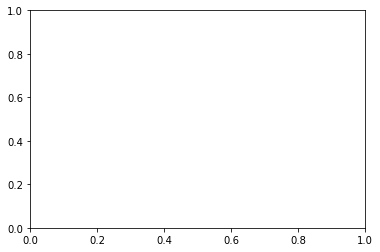

In [83]:
fig, ax = plt.subplots(1,1)
ax.plot()